In [84]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 10]

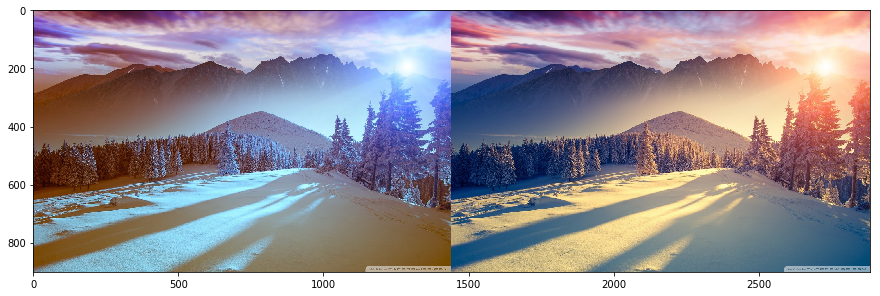

In [85]:
im = cv2.imread('./img/landscape .jpg')
h, w, c = im.shape

image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(np.hstack([im, image]))
plt.show()

In [86]:
image.shape = ((-1, 3))
image.shape

(1299242, 3)

In [87]:
from sklearn.cluster import MiniBatchKMeans
miniKMeans = MiniBatchKMeans(n_clusters=16, random_state=0, batch_size=20)

In [88]:
# miniKMeans.fit(image)

In [89]:
image2 = miniKMeans.fit_predict(image)

In [90]:
centroids = miniKMeans.cluster_centers_
centroids

array([[ 17.82443341,  28.73577195,  69.81500996],
       [182.55381596, 139.32637495, 163.08978991],
       [217.36538128, 183.10120252, 187.10990345],
       [ 92.56608912, 107.50417222, 128.37038593],
       [174.1267352 , 150.35059367, 132.32385051],
       [152.01972483,  93.57435773,  93.5761841 ],
       [247.37811629, 212.8295554 , 160.11626059],
       [ 56.29899389,  84.88188058, 121.12336624],
       [ 29.49389487,  58.81738411, 105.23060844],
       [216.68530366, 182.86546129, 140.03582754],
       [ 93.06673979,  64.2959838 ,  82.3383114 ],
       [136.07998159, 106.94683238, 154.49899304],
       [247.45175586, 228.21953605, 209.05687827],
       [131.49679961, 130.24402079, 132.26922812],
       [177.04638952, 162.64777525, 191.11648804],
       [226.25389613, 130.85901222, 114.31637058]])

In [91]:
labels = miniKMeans.labels_
labels

array([11, 11, 11, ..., 14, 14, 14], dtype=int32)

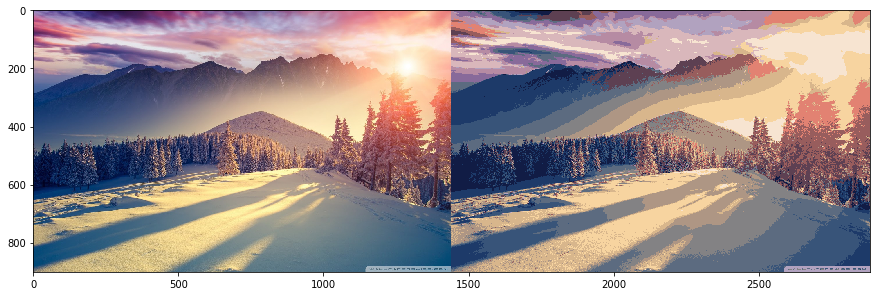

(901, 1442, 3)


In [98]:
quant = miniKMeans.cluster_centers_.astype("uint")[labels]

quant = quant.reshape((h, w, 3))
image = image.reshape((h, w, 3))

plt.imshow(np.hstack([image, quant]))
plt.show()

print(image.shape)

In [105]:
quant = cv2.cvtColor(quant, cv2.COLOR_RGB2BGR)
cv2.imwrite('.compressed.jpg', quant)

error: OpenCV(3.4.3) /io/opencv/modules/imgproc/src/color.hpp:257: error: (-2:Unspecified error) in function 'cv::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::Set<3, 4>; VDcn = cv::Set<3, 4>; VDepth = cv::Set<0, 2, 5>; cv::SizePolicy sizePolicy = (cv::SizePolicy)2u; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)
